In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
import pickle
import pandas as pd
import random

df = pd.read_csv("../../data/semantic/output/distance/distances_filtered.csv", index_col=0).reset_index(drop=True)
df.head()


,a,b,distance
0,%C3%85land,English_language,67.912435
1,%C3%85land,Whale,0.451414
2,%C3%89douard_Manet,Drawing,0.814898
3,%C3%89douard_Manet,Printmaking,0.485096
4,%C3%89ire,Fruit,1.128237


In [2]:
main_node = "Italy"
samples = 35
random_state = 139 # random.randint(13,192)
print(random_state)

139


In [3]:
reduced_df = df[df["a"] == main_node].sample(samples, random_state=random_state).sort_values("distance").copy()

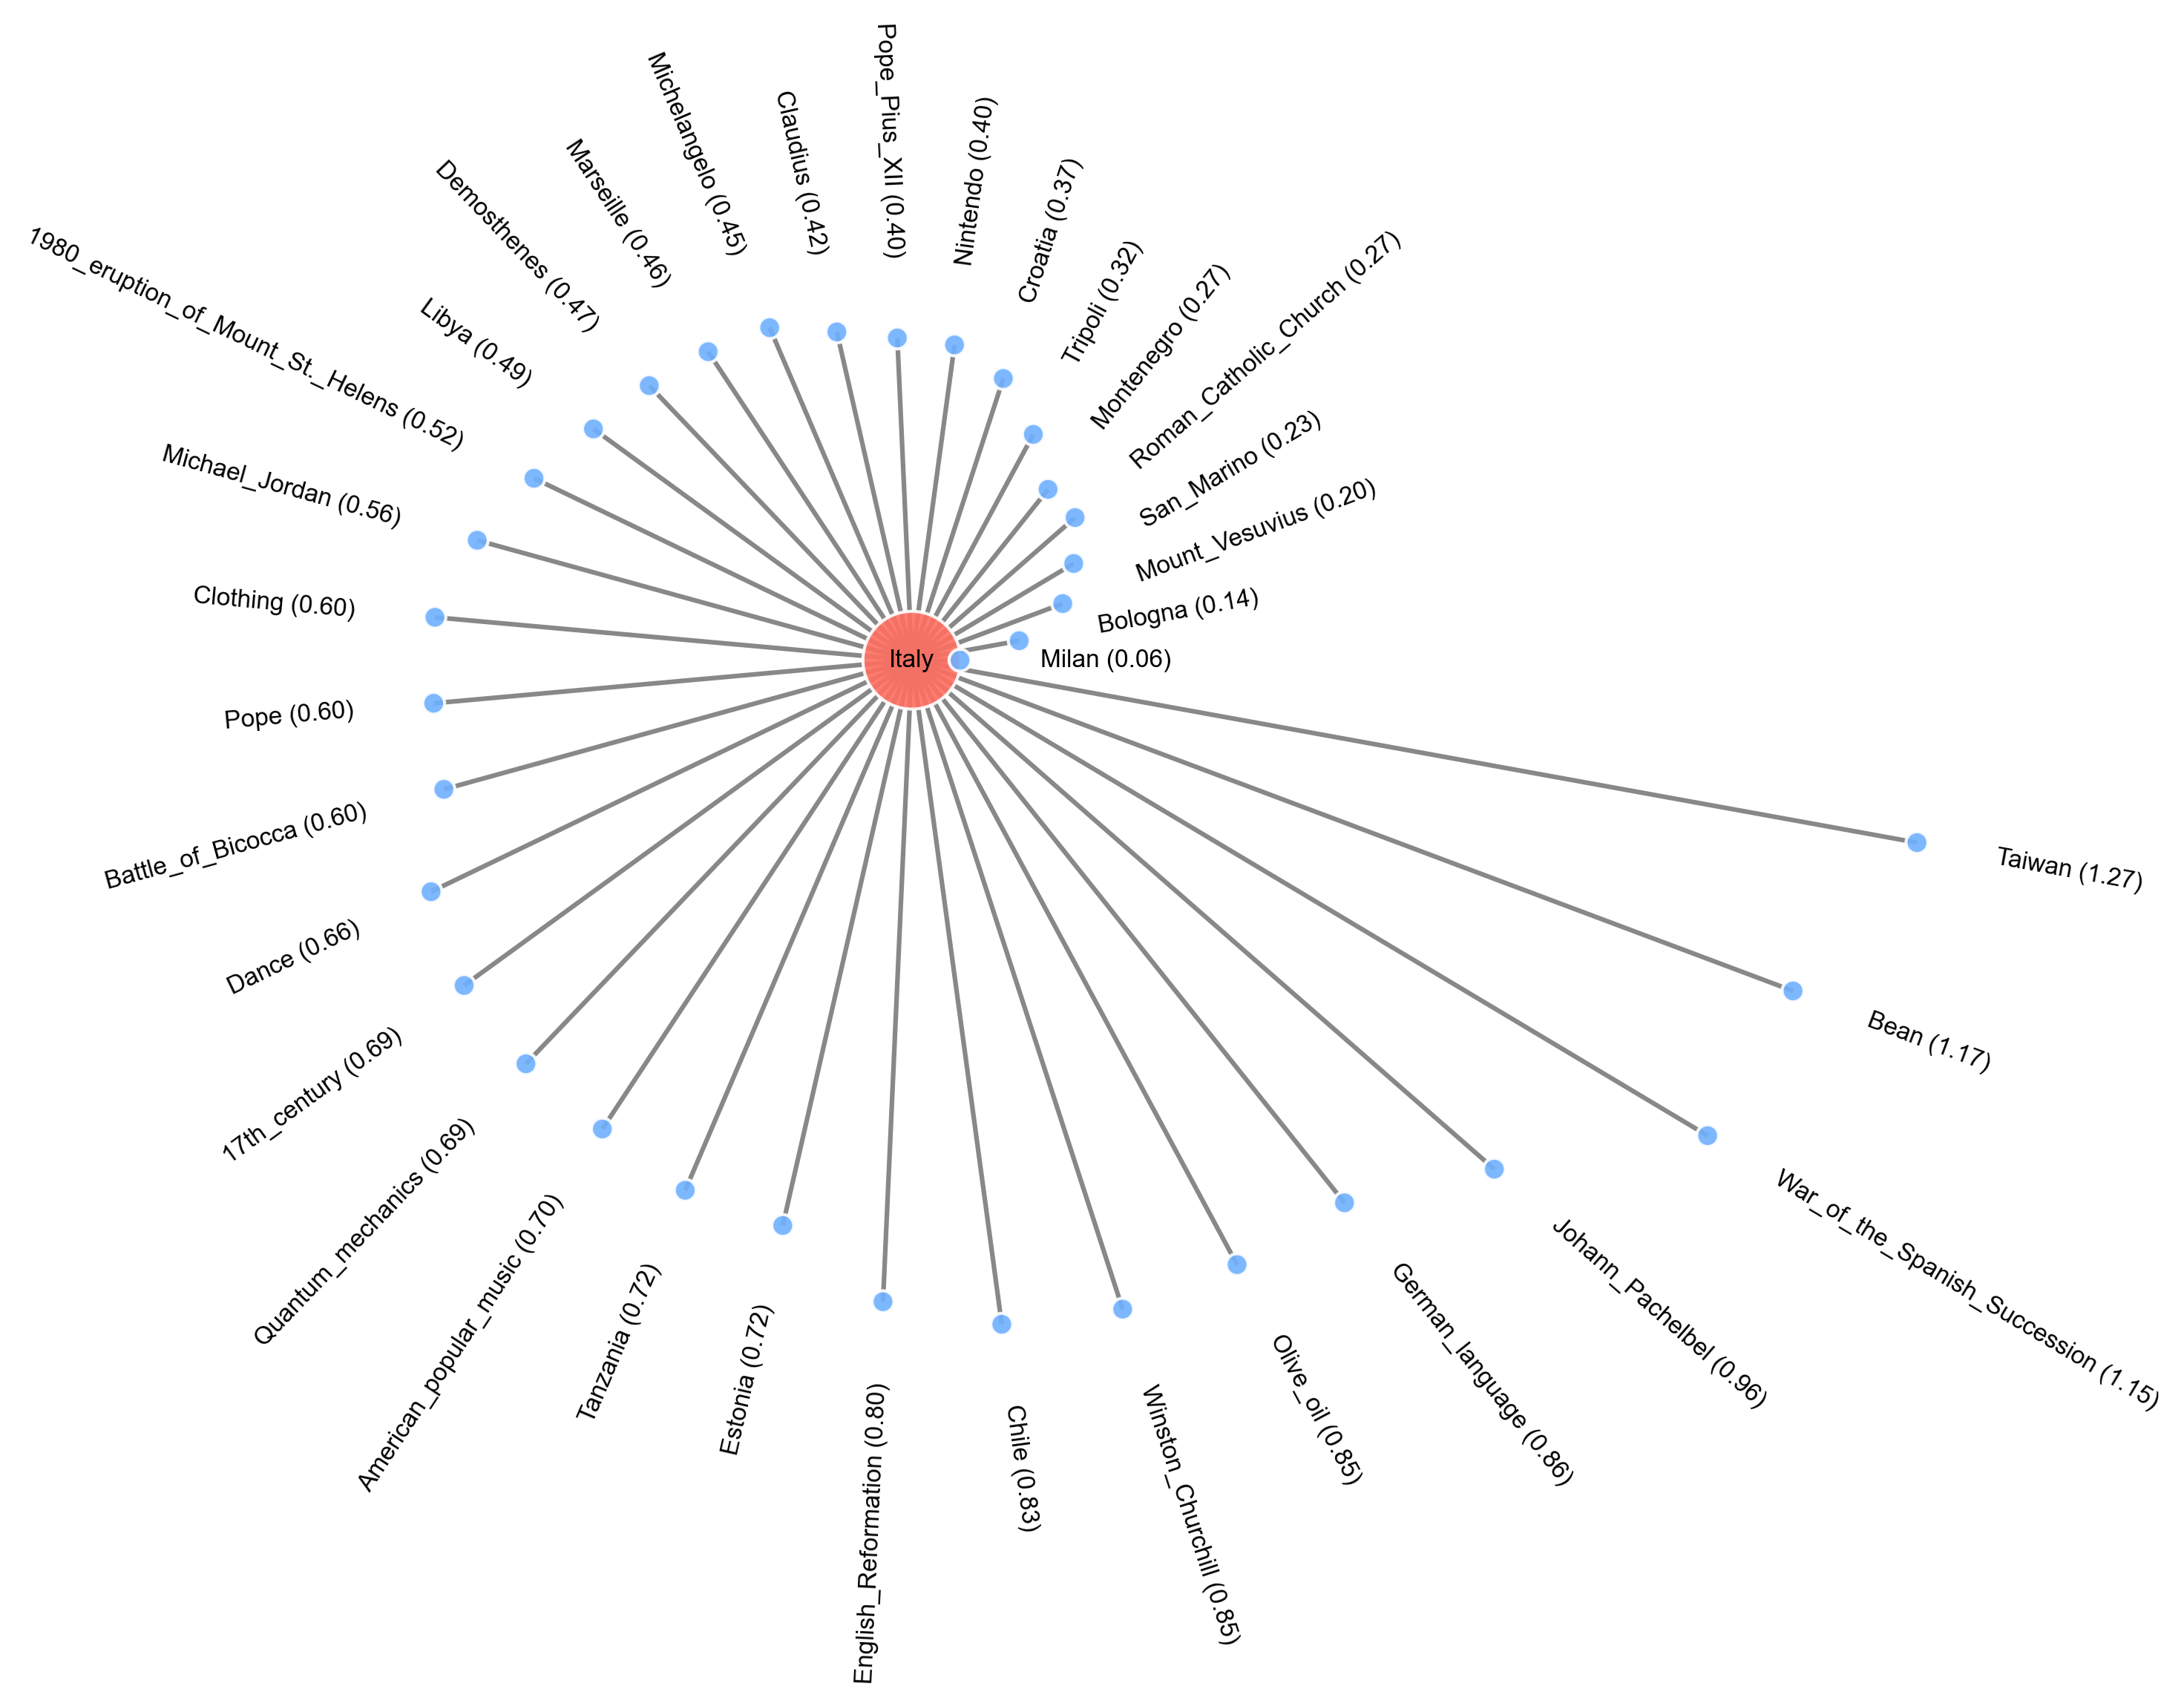

In [4]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


G = nx.Graph()
G.add_node(main_node)

for _, row in reduced_df.iterrows():
    G.add_node(row['b'])
    G.add_edge(main_node, row['b'], weight=row['distance'])

# Position Italy at (0,0). Multiply each distance by a scale factor so nodes
# appear further away from Italy.
distance_scale_factor = 2.0  # Try adjusting to 2.5, 3.0, etc. as needed

pos = {}
pos[main_node] = (0, 0)

num_words = len(reduced_df)
angles = np.linspace(0, 2*np.pi, num_words, endpoint=False)

for angle, (_, row) in zip(angles, reduced_df.iterrows()):
    # Scale the distance
    r = row['distance'] * distance_scale_factor
    x = r * np.cos(angle)
    y = r * np.sin(angle)
    pos[row['b']] = (x, y)

# Use the requested theme, and a higher DPI for clarity
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)

# Different sizes for Italy vs. other nodes
node_sizes = [1000 if node == main_node else 50 for node in G.nodes()]
node_colors = ["#FF6F61" if node == main_node else "#6FB1FF" for node in G.nodes()]

nx.draw_networkx_nodes(
    G, pos, node_size=node_sizes, node_color=node_colors,
    alpha=0.9, linewidths=1, edgecolors='white', ax=ax
)
nx.draw_networkx_edges(G, pos, width=1.5, edge_color="#888888", ax=ax)

# Reduced label logic for demonstration—still including distance in parentheses
for angle, (_, row) in zip(angles, reduced_df.iterrows()):
    distance_val = row['distance']
    label_text = f"{row['b']} ({distance_val:.2f})"
    angle_degs = np.degrees(angle)

    # Slight offset so labels don’t overlap the nodes
    offset = 0.2
    r = row['distance'] * distance_scale_factor
    x_offset = (r + offset) * np.cos(angle)
    y_offset = (r + offset) * np.sin(angle)

    if 90 < angle_degs <= 270:
        rotation = angle_degs + 180
        ha = 'right'
    else:
        rotation = angle_degs
        ha = 'left'

    ax.text(x_offset, y_offset, label_text,
            rotation=rotation,
            rotation_mode='anchor',
            fontsize=8,
            color='black',
            va='center', ha=ha)

# Center label for Italy
ax.text(0, 0, main_node, fontsize=8, color="black", ha='center', va='center')

ax.set_aspect('equal', 'box')
plt.axis('off')
plt.tight_layout()
plt.show()
